<a href="https://colab.research.google.com/github/basicallynabbo/DiseasePrediction/blob/master/DiseaseSymptomPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,precision_score,roc_curve,recall_score
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# **Reading and shuffling the dataset**
### Dataset is read using the pandas library and shuffled.
To randomize order of rows in dataset as it helps in reducing bias in data and prevents overfitting

In [ ]:
# Importing the dataset.csv file
df = pd.read_csv('/content/dataset.csv')

# Data shuffle for randomness
df = shuffle(df,random_state=42)

# Viewing the first elements of the dataset
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,Hypertension,headache,chest_pain,dizziness,loss_of_balance,lack_of_concentration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2575,Hypoglycemia,vomiting,fatigue,anxiety,sweating,headache,nausea,blurred_and_distorted_vision,excessive_hunger,drying_and_tingling_lips,slurred_speech,irritability,palpitations,NaN,NaN,NaN,NaN,NaN
765,Arthritis,muscle_weakness,stiff_neck,swelling_joints,painful_walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3751,Hepatitis B,itching,fatigue,lethargy,yellowish_skin,dark_urine,loss_of_appetite,abdominal_pain,yellow_urine,yellowing_of_eyes,malaise,receiving_blood_transfusion,receiving_unsterile_injections,NaN,NaN,NaN,NaN,NaN
4193,Migraine,acidity,indigestion,headache,blurred_and_distorted_vision,excessive_hunger,stiff_neck,depression,irritability,visual_disturbances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Removing Hyphen from strings**

Data cleaning ensures that the data is accurate, complete and consistent. It improves the quality of data which help prevent errors and biases

In [ ]:
# Looping the dataset and replacing all the _ with ' ' space character
for col in df.columns:
    df[col] = df[col].str.replace('_',' ')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Dataset characteristics**

Overview of the data selected and analysis

In [ ]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Acne,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,stomach bleeding,chest pain,chest pain,loss of smell,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


**Check for null and NaN values**

In [ ]:
#No of missing values in each column of the DataFrame
null_counts = df.isnull().sum()

#New DataFrame with the results
null_checker = pd.DataFrame({'count': null_counts})
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


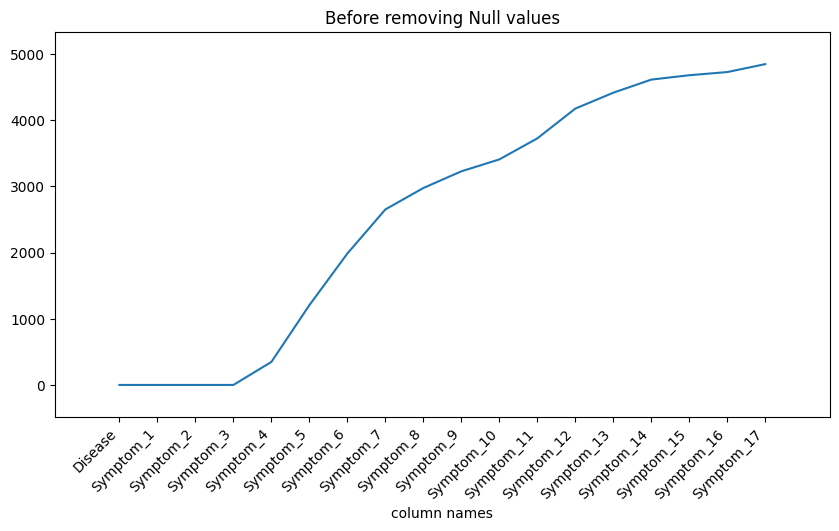

In [ ]:
# Plotting the null values to see the change in null by the columns
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('Before removing Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [ ]:
df.shape #total no. of rows and columns

(4920, 18)

**Remove the trailing space from the symptom columns**

In [ ]:
# Get the column names of the DataFrame
cols = df.columns

# Flatten the DataFrame into a one-dimensional array
data = df[cols].values.flatten()

# Create a Pandas Series from the flattened array
s = pd.Series(data)

# Remove leading and trailing white spaces from the values in the Series
s = s.str.strip()

# Reshape the cleaned Series back into a two-dimensional array with the same shape as the original DataFrame
s = s.values.reshape(df.shape)

# Create a new DataFrame from the cleaned array with the same column names as the original DataFrame
df = pd.DataFrame(s, columns=df.columns)

# Display the first five rows of the cleaned DataFrame
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Fill the NaN values with zero**

In [ ]:
# Replace all the NaN values in the dataset with 0
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


#Replace underscores in the 'Symptom' column with spaces

In [ ]:
df_severity = pd.read_csv('/content/Symptom-severity.csv')
df_severity['Symptom'] = df_severity['Symptom'].str.replace('_',' ')
df_severity.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


**Get overall list of symptoms**

In [ ]:
# Symptoms in the dataset
df_severity['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

**Encode symptoms in the data with the symptom rank**

In [ ]:
#values of the DataFrame
vals = df.values

#unique values in the 'Symptom' column of the df_severity
symptoms = df_severity['Symptom'].unique()

# Iterate over the unique symptoms and replace the values in the vals array with the weight of the symptom
for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df_severity[df_severity['Symptom'] == symptoms[i]]['weight'].values[0]

# new DataFrame from the cleaned array with the same column names as the original DataFrame
d = pd.DataFrame(vals, columns=cols)
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0


**Assign symptoms with no rank to zero**

simplifies data and removing the noise

In [ ]:
d = d.replace('dischromic  patches', 0)
d = d.replace('spotting  urination',0)
df = d.replace('foul smell of urine',0)
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0
5,Hypertension,3,7,4,4,3,0,0,0,0,0,0,0,0,0,0,0,0
6,Hypoglycemia,5,4,4,3,3,5,5,4,4,4,2,4,0,0,0,0,0
7,Arthritis,2,4,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Hepatitis B,1,4,2,3,4,4,4,4,4,6,5,2,0,0,0,0,0
9,Migraine,3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0



**Check if entire columns have zero values so we can drop those values**


In [ ]:
#count the number of missing values in a column
def count_missing_values(column):
    return sum(column.isnull())

# Apply the function to each column and create a new dataframe
null_checker = df.apply(count_missing_values).to_frame(name='count')

print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


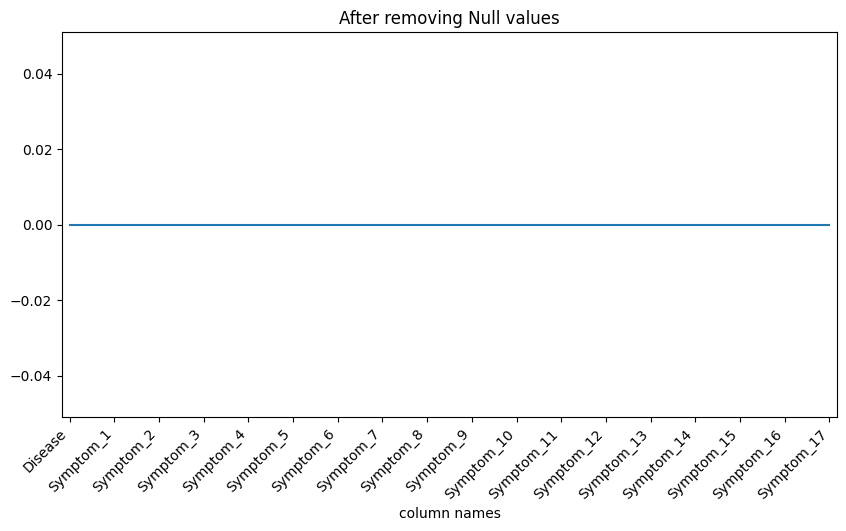

In [ ]:
# Plotting the null values after removal of the null values
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('After removing Null values')
plt.xlabel('column names')
plt.margins(0.01)
plt.show()

In [ ]:
print("Number of symptoms used to identify the disease in the dataset ",len(df_severity['Symptom'].unique()))
print("Number of diseases that can be identified in the dataset ",len(df['Disease'].unique()))

Number of symptoms used to identify the disease in the dataset  132
Number of diseases that can be identified in the dataset  41


**Get the names of diseases from data**

In [ ]:
# Getting the name of all the diseases from the dataset
df['Disease'].unique()

array(['Acne', 'Hyperthyroidism', 'AIDS', 'Chronic cholestasis',
       'Hypertension', 'Hypoglycemia', 'Arthritis', 'Hepatitis B',
       'Migraine', 'Urinary tract infection', 'Diabetes', 'Hepatitis D',
       'Psoriasis', 'Alcoholic hepatitis', 'Dimorphic hemmorhoids(piles)',
       'Hepatitis E', 'Cervical spondylosis', 'Bronchial Asthma',
       'hepatitis A', 'Allergy', 'Hepatitis C', 'Pneumonia',
       'Hypothyroidism', 'Gastroenteritis', 'Varicose veins', 'Jaundice',
       'Drug Reaction', '(vertigo) Paroymsal  Positional Vertigo',
       'Heart attack', 'Tuberculosis', 'Typhoid', 'Common Cold',
       'Peptic ulcer diseae', 'Paralysis (brain hemorrhage)',
       'Fungal infection', 'Impetigo', 'GERD', 'Dengue', 'Malaria',
       'Chicken pox', 'Osteoarthristis'], dtype=object)

### Select the features as symptoms column and label as Disease column



In [ ]:
# Select all rows and all columns except the first column
data = df.iloc[:, 1:].values

# Select the values in the 'Disease' column
labels = df['Disease'].values

## Splitting the dataset to training (80%) and testing (20%)

In [ ]:
# Splitting the dataset in training and testing dataset in 80-20 split
#`x_train`, `x_test`, `y_train`, and `y_test`. `x_train` and `x_test` contain the symptom data
#`y_train` and `y_test` contain disease label
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


# Gausian Naive Bayes

Gaussian NB
Accuracy: 0.8770325203252033
Precision: 0.8866837788311371
Recall: 0.8743870293145767
F1-Score: 0.8658357842139315
863
Confusion matrix
[[13  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 26  0]
 [ 0  0  0 ...  0  0 19]]
F1-score% = 86.58357842139314 | Accuracy% = 87.70325203252033


<Axes: >

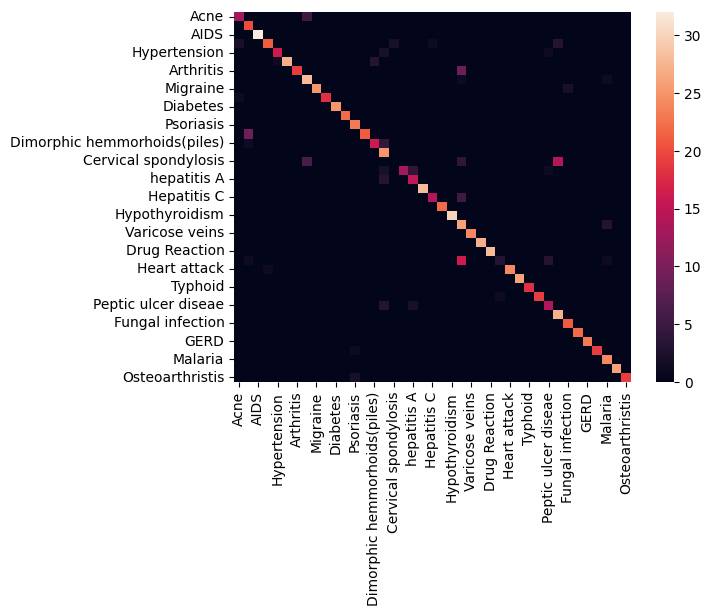

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Decision Tree classifier
NB_classifier = GaussianNB()

# Fit the model on the training data
NB_classifier.fit(x_train, y_train)

# Predict disease labels on the testing data
y_pred = NB_classifier.predict(x_test)

nb_accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Gaussian NB")
print(f'Accuracy: {nb_accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(y_test, y_pred,normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

#Creating confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

#Pandas DataFrame from the confusion matrix
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

#F1-score and accuracy of the predictions
print('F1-score% =', f1_score(y_test, y_pred, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, y_pred)*100)

#heatmap of the confusion matrix using Seaborn
sns.heatmap(df_cm)

In [ ]:
#KFold cross-validation (training)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

#cross-validation to compute the accuracy of the decision tree
nb_train = cross_val_score(NB_classifier, x_train, y_train, cv=kfold, scoring='accuracy')

#Pandas DataFrame from cross-validation scores
scores_df = pd.DataFrame(nb_train, columns=['Scores'])

#mean accuracy and standard deviation of the cross-validation scores
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (nb_train.mean()*100.0, nb_train.std()*100.0))

Mean Accuracy: 86.840%, Standard Deviation: (1.65%)


In [ ]:
#KFold cross-validation (testing)
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
nb_test =cross_val_score(NB_classifier, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(nb_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (nb_test.mean()*100.0, nb_test.std()*100.0))

Mean Accuracy: 85.666%, Standard Deviation: (1.77%)


# SVM


KNN
Accuracy: 0.983739837398374
Precision: 0.9842733295614424
Recall: 0.9804485456703155
F1-Score: 0.9806967923774239
968
Confusion matrix
[[16  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 26  0]
 [ 0  0  0 ...  0  0 21]]
F1-score% = 98.06967923774239 | Accuracy% = 98.3739837398374


<Axes: >

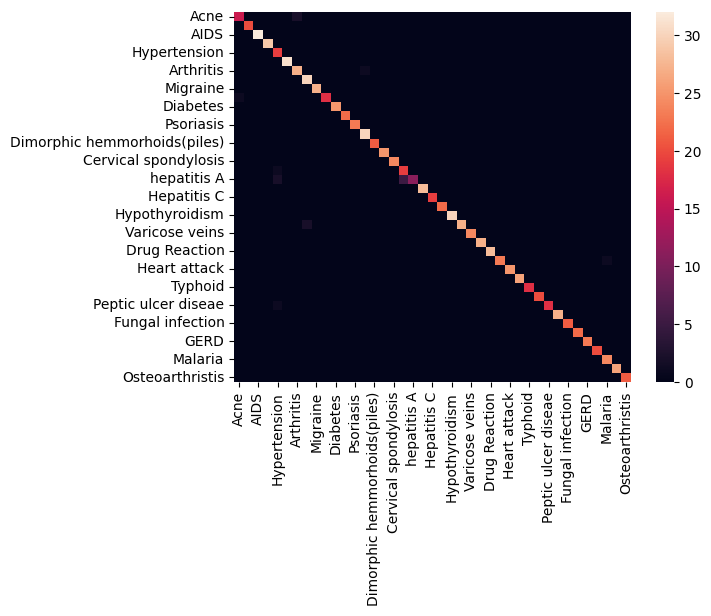

In [ ]:
from sklearn.svm import SVC

# Create an instance of the SVM classifier
svm_classifier = SVC(kernel='linear')

# Fit the model on the training data
svm_classifier.fit(x_train, y_train)

# Predict the labels for the test data
y_pred = svm_classifier.predict(x_test)

svm_accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("KNN")
print(f'Accuracy: {svm_accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(y_test, y_pred,normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

#Creating confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

#Pandas DataFrame from the confusion matrix
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

#F1-score and accuracy of the predictions
print('F1-score% =', f1_score(y_test, y_pred, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, y_pred)*100)


#heatmap of the confusion matrix using Seaborn
sns.heatmap(df_cm)

In [ ]:
#KFold cross-validation (training)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

#cross-validation to compute the accuracy of the decision tree
svm_train = cross_val_score(svm_classifier, x_train, y_train, cv=kfold, scoring='accuracy')

#Pandas DataFrame from cross-validation scores
scores_df = pd.DataFrame(svm_train, columns=['Scores'])

#mean accuracy and standard deviation of the cross-validation scores
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (svm_train.mean()*100.0, svm_train.std()*100.0))

Mean Accuracy: 98.425%, Standard Deviation: (0.63%)


In [ ]:
#KFold cross-validation (testing)
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
svm_test =cross_val_score(svm_classifier, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(svm_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (svm_test.mean()*100.0, svm_test.std()*100.0))

Mean Accuracy: 94.407%, Standard Deviation: (2.34%)


# K-Nearest Neighbours

KNN
Accuracy: 0.9959349593495935
Precision: 0.9962583148558758
Recall: 0.9957505201186312
F1-Score: 0.9958623060511337
980
Confusion matrix
[[18  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 26  0]
 [ 0  0  0 ...  0  0 21]]
F1-score% = 99.58623060511337 | Accuracy% = 99.59349593495935


<Axes: >

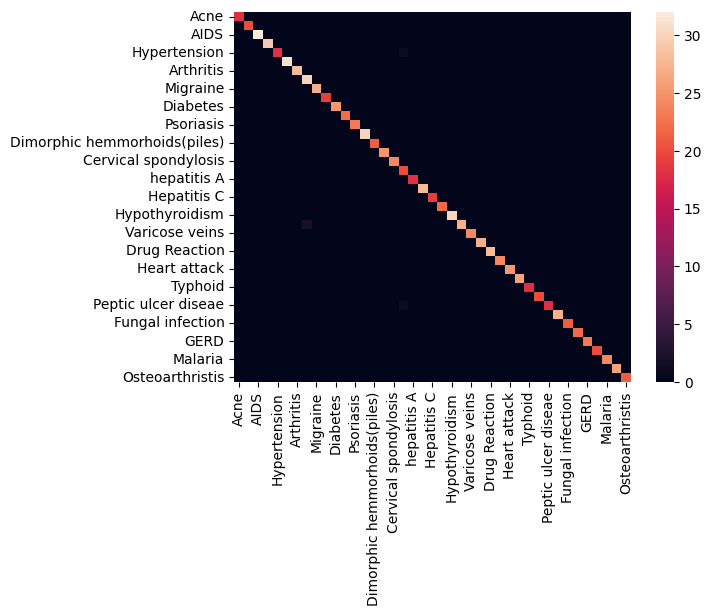

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create a k-NN classifier and specify the number of neighbors e.g. 3
k=3
knn_classifier = KNeighborsClassifier(n_neighbors=k)


# Fit the model on the training data
knn_classifier.fit(x_train, y_train)

# Predict the labels for the test data
y_pred = knn_classifier.predict(x_test)

knn_accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("KNN")
print(f'Accuracy: {knn_accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(y_test, y_pred,normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

#Creating confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

#Pandas DataFrame from the confusion matrix
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

#F1-score and accuracy of the predictions
print('F1-score% =', f1_score(y_test, y_pred, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, y_pred)*100)


#heatmap of the confusion matrix using Seaborn
sns.heatmap(df_cm)

In [ ]:
#KFold cross-validation (Training)
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
knn_train =cross_val_score(knn_classifier, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(knn_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (knn_train.mean()*100.0, knn_train.std()*100.0))

Mean Accuracy: 99.136%, Standard Deviation: (0.44%)


In [ ]:
#KFold cross-validation (testing)
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
knn_test =cross_val_score(knn_classifier, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(knn_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (knn_test.mean()*100.0, knn_test.std()*100.0))

Mean Accuracy: 95.119%, Standard Deviation: (2.80%)


# Decision Tree



F1-score% = 95.7812664665753 | Accuracy% = 95.83333333333334


<Axes: >

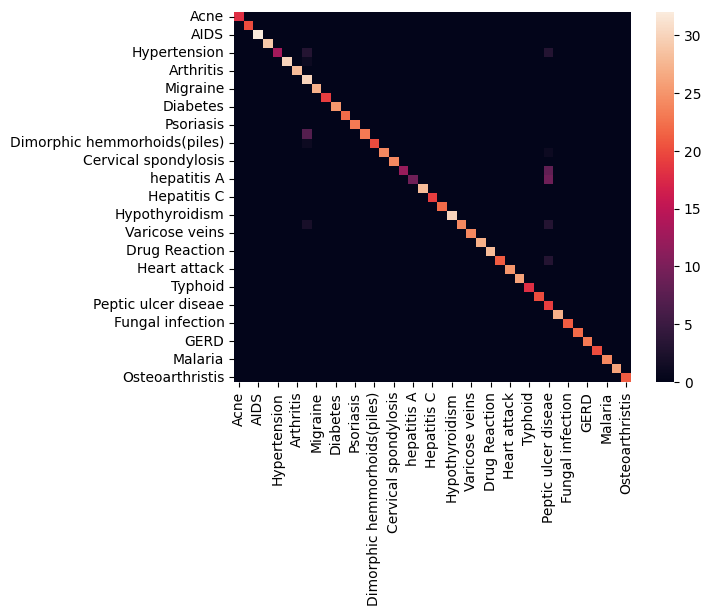

In [ ]:
# Create a decision tree classifier with the specified parameters
tree = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=13)

# Fit the classifier to the training data
tree.fit(x_train, y_train)

#Classifier to make predictions on the test data
preds = tree.predict(x_test)

#Creating confusion matrix
conf_mat = confusion_matrix(y_test, preds)

#Pandas DataFrame from the confusion matrix
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

#F1-score and accuracy of the predictions
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)

#heatmap of the confusion matrix using Seaborn
sns.heatmap(df_cm)

In [ ]:
#KFold cross-validation (training)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

#cross-validation to compute the accuracy of the decision tree
DS_train = cross_val_score(tree, x_train, y_train, cv=kfold, scoring='accuracy')

#Pandas DataFrame from cross-validation scores
scores_df = pd.DataFrame(DS_train, columns=['Scores'])

#mean accuracy and standard deviation of the cross-validation scores
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_train.mean()*100.0, DS_train.std()*100.0))

Mean Accuracy: 95.706%, Standard Deviation: (1.99%)


In [ ]:
#KFold cross-validation (testing)
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_test =cross_val_score(tree, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_test.mean()*100.0, DS_test.std()*100.0))

Mean Accuracy: 94.198%, Standard Deviation: (3.57%)


# Random Forest

F1-score% = 99.58380389536958 | Accuracy% = 99.59349593495935


<Axes: >

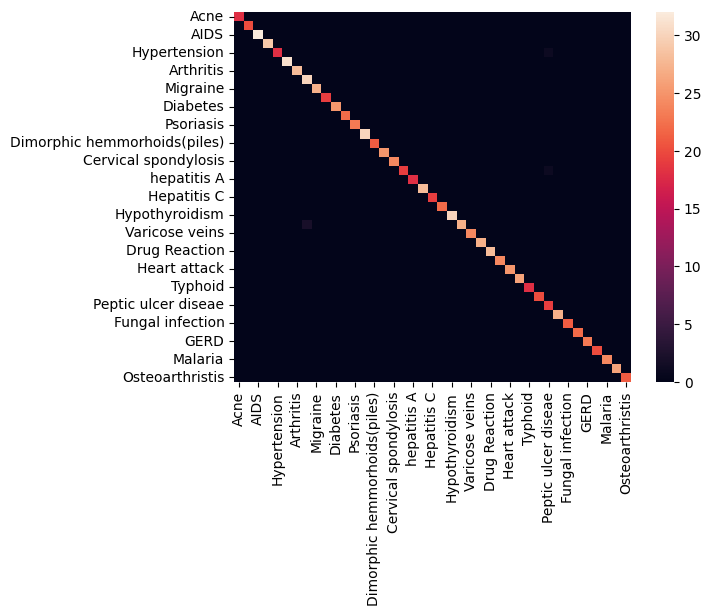

In [ ]:
# Training the Random forest classifier from the sklearn
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators=500, max_depth=13)

rnd_forest.fit(x_train, y_train)

preds = rnd_forest.predict(x_test)

#confusion matrix
conf_mat = confusion_matrix(y_test, preds)

#Pandas DataFrame from confusion matrix
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

#F1-score and accuracy of the predictions
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)

#heatmap of the confusion matrix
sns.heatmap(df_cm)


In [ ]:
#KFold cross-validation (Training)
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_train =cross_val_score(rnd_forest, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_train.mean()*100.0, rnd_forest_train.std()*100.0))

Mean Accuracy: 99.187%, Standard Deviation: (0.44%)


In [ ]:
##KFold cross-validation (Testing)
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_test =cross_val_score(rnd_forest, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_test.mean()*100.0, rnd_forest_test.std()*100.0))

Mean Accuracy: 98.575%, Standard Deviation: (1.31%)


# Comparing Accuracy of all the models

In [ ]:
# Labels and values for the graph
algorithms = ('Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM','KNN')
accuracy_values = (DS_train.mean()*100.0,
                 rnd_forest_train.mean()*100.0,nb_accuracy*100.0,svm_accuracy*100.0,knn_accuracy*100.0)

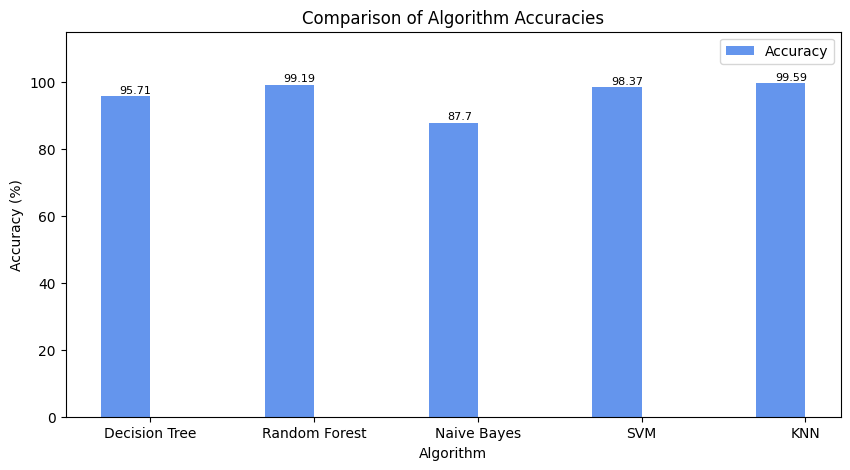

In [ ]:
# create plot
# Plotting the difference in the accuracies of the algorithms
fig, ax = plt.subplots(figsize=(10, 5))
index = np.arange(5)
bar_width = 0.3
opacity = 1
rects = plt.bar(index, accuracy_values, bar_width, alpha = opacity, color='Cornflowerblue', label='Accuracy')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(accuracy_values):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))

# Comparison between algorithms after testing and training

In [ ]:
n_groups = 5 #no. of groups in bar chart
algorithms = ('Decision Tree', 'Random Forest', 'Naive Bayes', 'KNN','SVM')
train_accuracy = (DS_train.mean()*100.0,
                 rnd_forest_train.mean()*100.0,nb_train.mean()*100.0,knn_train.mean()*100.0,svm_train.mean()*100.0,)

In [ ]:
test_accuracy = (DS_test.mean()*100.0,
                 rnd_forest_test.mean()*100.0,nb_test.mean()*100.0,knn_test.mean()*100.0,svm_test.mean()*100.0,)

In [ ]:
Standard_Deviation=(DS_test.std()*100.0,
                 rnd_forest_test.std()*100.0,nb_test.std()*100.0,knn_test.std()*100.0,svm_test.std()*100.0,)

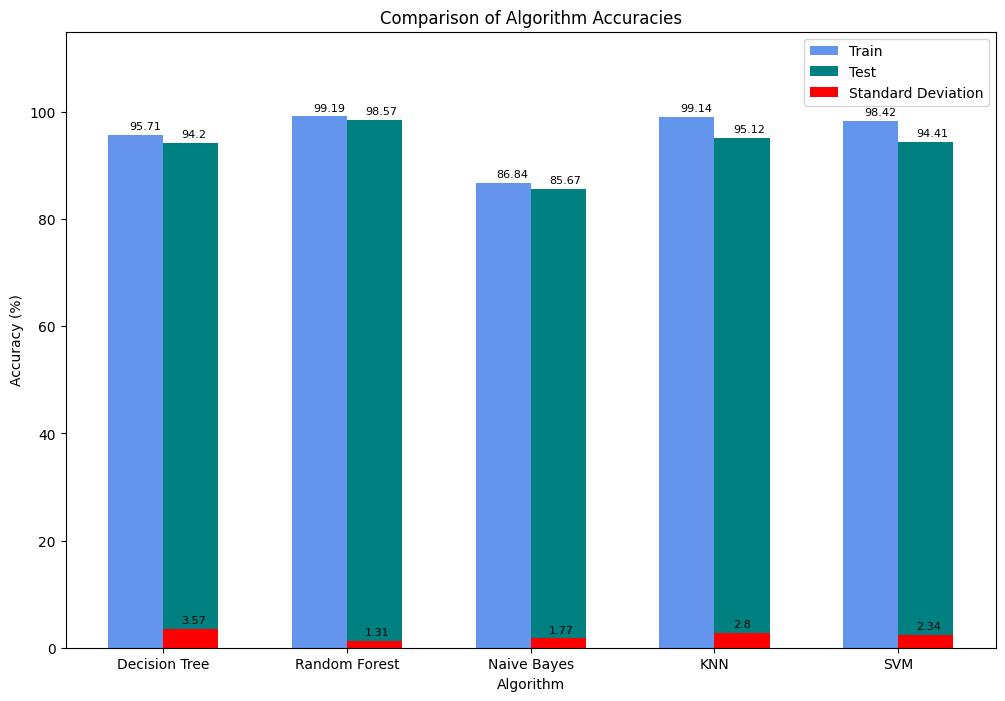

In [ ]:
# create plot
# Plotting the difference in the accuracies of the algorithms
fig, ax = plt.subplots(figsize=(12, 8))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Teal', label='Test')
rects3 = plt.bar(index + bar_width, Standard_Deviation, bar_width, alpha = opacity, color='red', label='Standard Deviation')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(Standard_Deviation):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))

# Function to manually test the models

The model with the best accuracy and score is selected for the solution i.e. random forest

Loading the description and the precautions dataset

In [ ]:
description = pd.read_csv("/content/symptom_Description.csv")

In [ ]:
description.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [ ]:
symptom_precaution = pd.read_csv("/content/symptom_precaution.csv")

In [ ]:
symptom_precaution.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [ ]:
def predictDisease(model, predictSymptoms):
    """
    x is model and predictSymptoms is list of the symptoms to be used to predict the disease.
    The function returns the prediction of the disease, required presciption and description of the disease.
    """

    # symptoms and weights will store symptom names and their weights
    symptoms = np.array(df_severity["Symptom"])
    weights = np.array(df_severity["weight"])

    # Nested loop Iterate through the provided symptoms and replace their names with weights
    for j in range(len(predictSymptoms)):
        for k in range(len(symptoms)):
            if predictSymptoms[j] == symptoms[k]:
                predictSymptoms[j] = weights[k]

    #list 'predictionList' with the updated symptom weights
    predictionList = [predictSymptoms]

    # Predict the disease using the 'x' model
    predictedDisease = model.predict(predictionList)

    # Retrieves the disease description for the predicted disease
    display = description[description['Disease'] == predictedDisease[0]]
    display = display.values[0][1]

    # Retrieves recommended precautions for the predicted disease.
    recomnd = symptom_precaution[symptom_precaution['Disease'] == predictedDisease[0]]
    precautions = np.where(symptom_precaution['Disease'] == predictedDisease[0])[0][0]
    precaution_list = []

    # Retrives 'precaution_list' with recommended precautions.
    for i in range(1, len(symptom_precaution.iloc[precautions])):
        precaution_list.append(symptom_precaution.iloc[precautions, i])

    # Print the predicted disease, its description, and recommended precautions.
    print("The Disease Name: ", predictedDisease[0])
    print("The Disease Description: ", display)
    print("Recommended Things to do at home: ")
    for i in precaution_list:
        print(i)

# **Taking input from the user and predicting the disease based on the input**

In [ ]:
# Initialising the model
# knn_classifier, rnd_forest, NB_classifier, svm_classifier, tree
model = rnd_forest

In [ ]:
symptoms_input = input().split(",")

breathlessness,chills,sweating,dark urine


In [ ]:
# filling the rest of the input list with zeros
for i in range((17-len(symptoms_input))):
  symptoms_input.append(0)
print(symptoms_input)

['breathlessness', 'chills', 'sweating', 'dark urine', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# Predict using the algorithm
predictDisease(model, symptoms_input)

The Disease Name:  Allergy
The Disease Description:  An allergy is an immune system response to a foreign substance that's not typically harmful to your body.They can include certain foods, pollen, or pet dander. Your immune system's job is to keep you healthy by fighting harmful pathogens.
Recommended Things to do at home: 
apply calamine
cover area with bandage
nan
use ice to compress itching
